<a href="https://colab.research.google.com/github/insight4healthlab/course-GS-HLTH-6270/blob/main/notebooks/Assignment_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the data
df = pd.read_csv('/content/gdrive/My Drive/course-GS-HLTH-6270/datasets/diabetic_data/diabetic_data.csv')


# Data Exploration

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In this database, you have 3 different outputs:

*   No readmission (NO)
*   A readmission in less than 30 days (<30)
*   A readmission in more than 30 days (>30)

In [ ]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

to simplify the problem you can turn it into a binary classifier No readmission and readmission using the following command

In [ ]:
df['readmitted'] = df['readmitted'].replace(['NO', '<30', '>30'], ['No', 'Yes', 'Yes'])
df.readmitted.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['metformin'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [ ]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
        'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
        'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
        'glipizide-metformin', 'glimepiride-pioglitazone',
        'metformin-rosiglitazone', 'metformin-pioglitazone']

# Count the number of medications with increased dosage
df['num_med_up'] = df[meds].apply(lambda x: sum(x == 'Up'), axis=1)

# Compute the total number of medications used by each patient
df['num_med_used'] = df[meds].apply(lambda x: sum(x != 'No'), axis=1)

In [ ]:
df[['num_med_used','num_medications']]

,num_med_used,num_medications
0,0,1
1,1,18
2,1,13
3,1,16
4,2,8
...,...,...
101761,2,16
101762,1,18
101763,2,9
101764,3,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

array([[<Axes: title={'center': 'number_diagnoses'}>]], dtype=object)

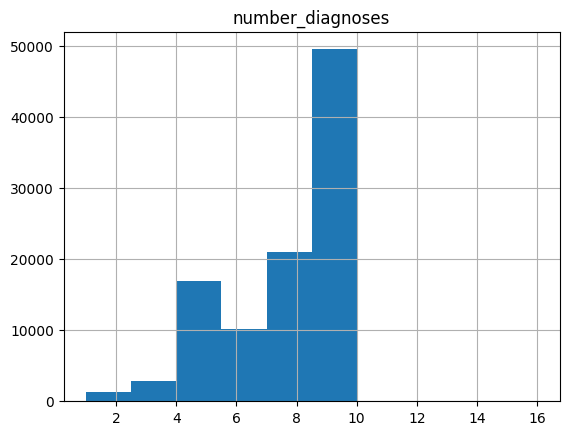

In [ ]:
df.hist('number_diagnoses')

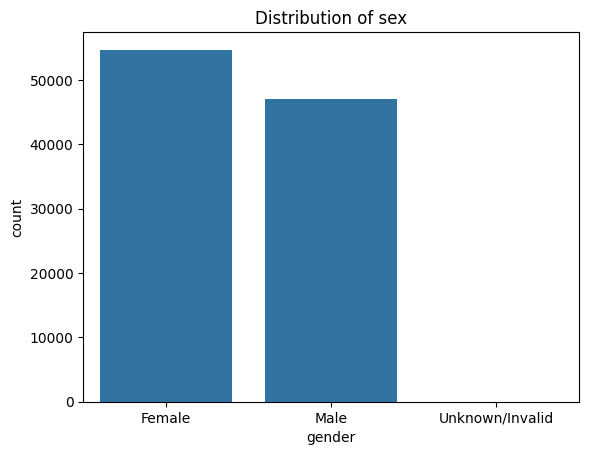

In [ ]:
# Plot the distribution of gender
sns.countplot(data=df, x='gender')
plt.title('Distribution of sex')
plt.show()

# Feature Engineering

In [ ]:
len(df)

1517